In [ ]:
import os
import sys
import glob

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
# sns.set(font_scale = 1.5)
sns.set_style("white")
import pandas as pd
import datetime
%matplotlib inline

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

from google.colab import drive
drive.mount('/content/drive')

base_data_path = '/content/drive/Shareddrives/TuriLab/Data/PTSD_project/!analisis/'
savedir = '/content/drive/Shareddrives/TuriLab/Data/PTSD_project/!analysis/saveFolder/'

Mounted at /content/drive


In [ ]:
worksheet = gc.open('PTSD_YMaze_performance').sheet1

# get_all_values gives a list of rows.
data = worksheet.get_all_values()
# print(data)

# Convert to a DataFrame and render.
import pandas as pd
df = pd.DataFrame.from_records(data)
df.columns = df.iloc[0]
df.drop(df.index[0], inplace=True)
df.reset_index(inplace=True, drop=True)

# adding unique ID-s based on `id` and `cohort`
df['cohort_id']= df['Cohort']+'_'+df['Mouse ID']

df['Performance'] = df['Performance'].astype(float)

In [ ]:
df
# it has 1 NaN!
df = df

,Cohort,Behavior,Timepoint,Mouse ID,Performance,cohort_id
0,PTSD6,Ymaze,baseline,51,0.59,PTSD6_51
1,PTSD6,Ymaze,baseline,52,0.58,PTSD6_52
2,PTSD6,Ymaze,baseline,61,0.54,PTSD6_61
3,PTSD6,Ymaze,baseline,62,0.58,PTSD6_62
4,PTSD6,Ymaze,baseline,63,0.56,PTSD6_63
...,...,...,...,...,...,...
97,PTSD2,Ymaze,4wk,91,0.46,PTSD2_91
98,PTSD2,Ymaze,4wk,92,0.50,PTSD2_92
99,PTSD2,Ymaze,4wk,93,0.43,PTSD2_93
100,PTSD2,Ymaze,4wk,94,0.57,PTSD2_94


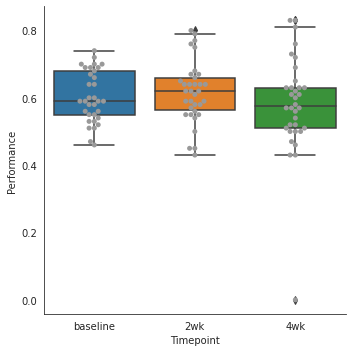

In [ ]:
g = sns.catplot(data=df, kind='box', x='Timepoint', y='Performance', kind='point')
g = sns.swarmplot(data=df, x='Timepoint', y='Performance', color='0.6')
plt.savefig(os.path.join(savedir, 'Y_maze_performance.png'), 
            transparent=True, dpi=300, figsize=(5, 5))

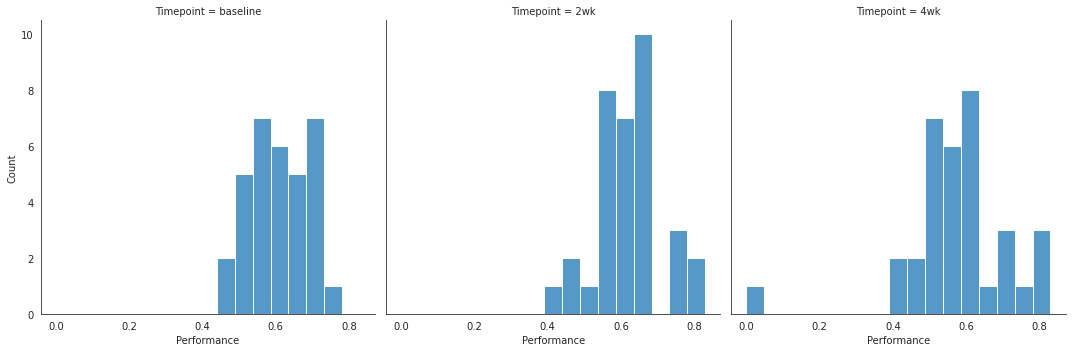

In [ ]:
sns.displot(data=df, x='Performance', col='Timepoint')

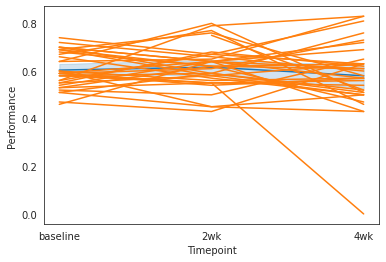

In [ ]:
g = sns.lineplot(data=df, x='Timepoint', y='Performance')
g = sns.lineplot(data=df, x='Timepoint', y='Performance', units='cohort_id',
                 estimator=None)

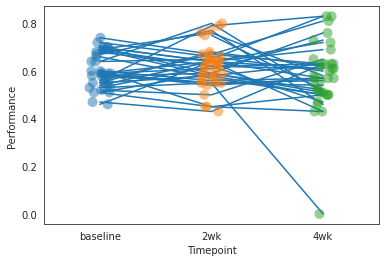

In [ ]:
# fig = plt.subplots(figsize=(10,10))
g = sns.lineplot(data=df, x='Timepoint', y='Performance', units='cohort_id',
                 estimator=None)
g = sns.stripplot(data=df, x='Timepoint', y='Performance', s=10, alpha=0.5)
# plt.savefig(os.path.join(savedir, 'Y_maze_performance_lineplot.png'), 
#             transparent=True, dpi=300, figsize=(8, 8))

In [ ]:
df_w = df.pivot(index='cohort_id', columns='Timepoint', values='Performance')

In [ ]:
df_w.head()

Timepoint,2wk,4wk,baseline
cohort_id,,,
PTSD2_81,0.66,0.60,0.72
PTSD2_82,0.64,0.69,0.46
PTSD2_83,0.50,0.65,0.52
PTSD2_84,0.80,0.51,0.64
PTSD2_85,0.75,0.52,NaN


KeyError: ignored

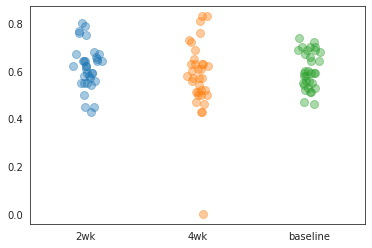

In [ ]:
# run this again when that missing data comes up
jitter = 0.05
df_x_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter,
                                            size=df_w.values.shape),
                            columns=df_w.columns)

df_x_jitter += np.arange(len(df_w.columns))

fig, ax = plt.subplots()
for col in df_w:
    ax.plot(df_x_jitter[col], df_w[col], 'o', alpha=.40, zorder=1, ms=8, mew=1)
ax.set_xticks(range(len(df_w.columns)))
ax.set_xticklabels(df_w.columns)
ax.set_xlim(-0.5,len(df_w.columns)-0.5)

for idx in df_w.index:
    ax.plot(df_x_jitter.loc[idx,['baseline','2wk']],
            df_w.loc[idx,['baseline','2wk']],
            color = 'grey', linewidth = 0.5, linestyle = '--', zorder=-1)
    ax.plot(df_x_jitter.loc[idx,['2wk','4wk']],
            df_w.loc[idx,['2wk','4wk']],
            color = 'grey', linewidth = 0.5, linestyle = '--', zorder=-1)